In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amritvirsinghx/environmental-news-nlp-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'environmental-news-nlp-dataset' dataset.
Path to dataset files: /kaggle/input/environmental-news-nlp-dataset


In [ ]:
import os

base_path = "/kaggle/input/environmental-news-nlp-dataset"
os.listdir(base_path)


['TelevisionNews']

In [ ]:
os.listdir(base_path + "/TelevisionNews")

['CNN.201201.csv',
 'MSNBC.201901.csv',
 'FOXNEWS.201103.csv',
 'BBCNEWS.201906.csv',
 'FOXNEWS.201304.csv',
 'FOXNEWS.201706.csv',
 'CNN.201106.csv',
 'MSNBC.201706.csv',
 'MSNBC.201112.csv',
 'MSNBC.201201.csv',
 'FOXNEWS.201101.csv',
 'CNN.201808.csv',
 'FOXNEWS.201609.csv',
 'CNN.201804.csv',
 'FOXNEWS.201011.csv',
 'CNN.201906.csv',
 'FOXNEWS.201012.csv',
 'FOXNEWS.201106.csv',
 'FOXNEWS.201206.csv',
 'CNN.201309.csv',
 'CNN.201905.csv',
 'BBCNEWS.201904.csv',
 'MSNBC.201907.csv',
 'CNN.201005.csv',
 'BBCNEWS.201905.csv',
 'CNN.201508.csv',
 'FOXNEWS.201910.csv',
 'CNN.201312.csv',
 'MSNBC.201511.csv',
 'CNN.201806.csv',
 'CNN.201605.csv',
 'FOXNEWS.201612.csv',
 'FOXNEWS.201403.csv',
 'FOXNEWS.201502.csv',
 'MSNBC.201001.csv',
 'BBCNEWS.201802.csv',
 'CNN.201903.csv',
 'CNN.201203.csv',
 'FOXNEWS.201906.csv',
 'FOXNEWS.200911.csv',
 'CNN.201204.csv',
 'MSNBC.201011.csv',
 'CNN.201009.csv',
 'CNN.201007.csv',
 'MSNBC.201810.csv',
 'MSNBC.201502.csv',
 'MSNBC.201808.csv',
 'FOXNEWS

In [ ]:
import os
import pandas as pd

folder_path = "/kaggle/input/environmental-news-nlp-dataset/TelevisionNews"

csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

len(csv_files)


418

In [ ]:
df_list = []

skipped_files = 0

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        temp_df = pd.read_csv(file_path)
        if not temp_df.empty:
            df_list.append(temp_df)
        else:
            skipped_files += 1
    except Exception:
        skipped_files += 1

df = pd.concat(df_list, ignore_index=True)

print("Merged shape:", df.shape)
print("Skipped files:", skipped_files)

Merged shape: (94858, 7)
Skipped files: 1


In [ ]:
df.columns
df.head(2)

,URL,MatchDateTime,Station,Show,IAShowID,IAPreviewThumb,Snippet,snippet_length,clean_snippet
0,https://archive.org/details/CNNW_20120121_0200...,2012-01-21 02:10:10,CNN,Piers Morgan Tonight,CNNW_20120121_020000_Piers_Morgan_Tonight,https://archive.org/download/CNNW_20120121_020...,sense that if you look at the two leading cand...,33,sense that if you look at the two leading cand...
1,https://archive.org/details/CNNW_20120127_0100...,2012-01-27 02:58:38,CNN,Fl Rep-Debate,CNNW_20120127_010000_Fl_Rep-Debate,https://archive.org/download/CNNW_20120127_010...,bailouts like these two men were. governor rom...,39,bailouts like these two men were. governor rom...


In [ ]:
df.shape


(94858, 7)

In [ ]:
df['Snippet'].isnull().sum()


np.int64(0)

In [ ]:
df['snippet_length'] = df['Snippet'].astype(str).apply(lambda x: len(x.split()))

df['snippet_length'].describe()


,snippet_length
count,94858.000000
mean,41.155042
std,9.604375
min,2.000000
25%,35.000000
50%,41.000000
75%,47.000000
max,194.000000


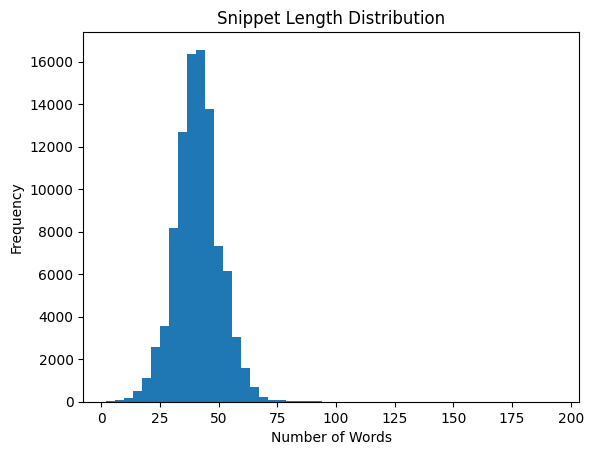

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['snippet_length'], bins=50)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Snippet Length Distribution")
plt.show()


<Figure size 1000x600 with 0 Axes>

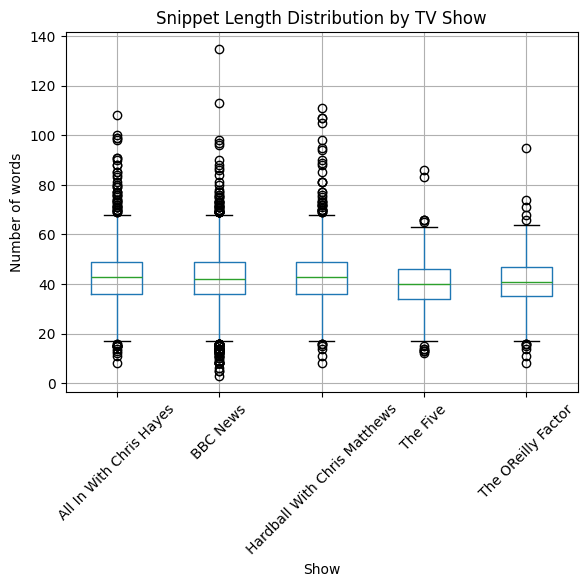

In [ ]:
import matplotlib.pyplot as plt

top_shows = df['Show'].value_counts().head(5).index

subset = df[df['Show'].isin(top_shows)]

plt.figure(figsize=(10,6))
subset.boxplot(column='snippet_length', by='Show', rot=45)
plt.title("Snippet Length Distribution by TV Show")
plt.suptitle("")
plt.ylabel("Number of words")
plt.show()


In [ ]:
df[['Snippet']].isnull().sum()

,0
Snippet,0


In [ ]:
df['clean_snippet'] = df['Snippet'].astype(str).str.strip()


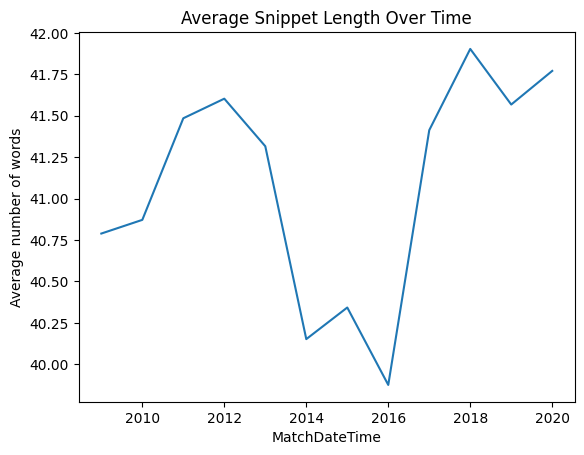

In [ ]:
df['MatchDateTime'] = pd.to_datetime(df['MatchDateTime'], errors='coerce')

df.groupby(df['MatchDateTime'].dt.year)['snippet_length'].mean().plot()
plt.title("Average Snippet Length Over Time")
plt.ylabel("Average number of words")
plt.show()


# **Milestone 2**

In [ ]:
import re #Minimal preprocessing

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk #Sentence splitting
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

def split_sentences(text):
    return sent_tokenize(text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from collections import Counter #word frequency scoring

def sentence_scores(sentences):
    words = []
    for sent in sentences:
        words.extend(sent.split())
    freq = Counter(words)

    scores = {}
    for sent in sentences:
        score = sum(freq[word] for word in sent.split())
        scores[sent] = score
    return scores


In [ ]:
#Generate summary
def generate_summary(text, n_sentences=1):
    text = preprocess_text(text)
    sentences = split_sentences(text)

    if len(sentences) <= n_sentences:
        return text

    scores = sentence_scores(sentences)
    ranked = sorted(scores, key=scores.get, reverse=True)
    summary = ' '.join(ranked[:n_sentences])
    return summary


In [ ]:
sample_text = df['Snippet'].iloc[0]
print("ORIGINAL:\n", sample_text)
print("\nSUMMARY:\n", generate_summary(sample_text))


ORIGINAL:
 sense that if you look at the two leading candidates, gingrich and romney, there are three issues that started the tea party. obamacare, the government takeover of cap and trade and global warming.

SUMMARY:
 sense that if you look at the two leading candidates, gingrich and romney, there are three issues that started the tea party.


In [ ]:
print(generate_summary(sample_text, n_sentences=2))

sense that if you look at the two leading candidates, gingrich and romney, there are three issues that started the tea party. obamacare, the government takeover of cap and trade and global warming.


# **Milestone 3**

In [ ]:
!pip install transformers sentencepiece torch

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration
import torch

In [ ]:
model_name = "facebook/bart-large-cnn"

tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
model.eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

BartForConditionalGeneration(
  (model): BartModel(
    (shared): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        

In [ ]:
def bart_summarize(text, max_input_length=512, max_summary_length=60):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        max_length=max_input_length,
        truncation=True
    )

    with torch.no_grad():
        summary_ids = model.generate(
            inputs["input_ids"],
            max_length=max_summary_length,
            min_length=20,
            num_beams=4,
            length_penalty=2.0,
            early_stopping=True
        )

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
sample_text = df['Snippet'].iloc[0]

print("ORIGINAL:\n", sample_text)
print("\nEXTRACTIVE SUMMARY (Milestone 2):\n", generate_summary(sample_text))
print("\nABSTRACTIVE SUMMARY (BART):\n", bart_summarize(sample_text))

ORIGINAL:
 sense that if you look at the two leading candidates, gingrich and romney, there are three issues that started the tea party. obamacare, the government takeover of cap and trade and global warming.

EXTRACTIVE SUMMARY (Milestone 2):
 sense that if you look at the two leading candidates, gingrich and romney, there are three issues that started the tea party.

ABSTRACTIVE SUMMARY (BART):
 sense that if you look at the two leading candidates, gingrich and romney, there are three issues that started the tea party. obamacare, the government takeover of cap and trade and global warming.


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=bcc271912ba0ccfcd63c2d04cdb98688eab1e90ce991c0da60730e02c184c80b
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

reference = generate_summary(sample_text)
candidate = bart_summarize(sample_text)

scores = scorer.score(reference, candidate)
scores

{'rouge1': Score(precision=0.6666666666666666, recall=1.0, fmeasure=0.8),
 'rougeL': Score(precision=0.6666666666666666, recall=1.0, fmeasure=0.8)}

Test on larger sample

In [ ]:
import numpy as np
import pandas as pd

SEED = 42
sample_size_bart = 50   # safe number for Colab
sample_size_base = 1000  # fast for baseline

df_base = df.sample(n=sample_size_base, random_state=SEED).copy()
df_bart = df.sample(n=sample_size_bart, random_state=SEED).copy()

In [ ]:
# test it on Milestone 2
df_base["baseline_summary"] = df_base["Snippet"].astype(str).apply(lambda x: generate_summary(x, n_sentences=1))
df_base["snippet_words"] = df_base["Snippet"].astype(str).apply(lambda x: len(x.split()))
df_base["baseline_words"] = df_base["baseline_summary"].astype(str).apply(lambda x: len(x.split()))

df_base[["snippet_words", "baseline_words"]].describe()

,snippet_words,baseline_words
count,1000.000000,1000.000000
mean,40.871000,21.694000
std,9.334854,8.605022
min,9.000000,6.000000
25%,35.000000,16.000000
50%,41.000000,20.000000
75%,47.000000,26.000000
max,107.000000,61.000000


In [ ]:
# BART 3la sample akbr shwya
df_bart["baseline_summary"] = df_bart["Snippet"].astype(str).apply(lambda x: generate_summary(x, n_sentences=1))
df_bart["bart_summary"] = df_bart["Snippet"].astype(str).apply(lambda x: bart_summarize(x))

df_bart["bart_words"] = df_bart["bart_summary"].astype(str).apply(lambda x: len(x.split()))
df_bart["snippet_words"] = df_bart["Snippet"].astype(str).apply(lambda x: len(x.split()))
df_bart["baseline_words"] = df_bart["baseline_summary"].astype(str).apply(lambda x: len(x.split()))

df_bart[["snippet_words", "baseline_words", "bart_words"]].describe()

,snippet_words,baseline_words,bart_words
count,50.000000,50.000000,50.000000
mean,42.840000,19.980000,30.960000
std,12.979356,7.723513,8.689567
min,24.000000,7.000000,16.000000
25%,34.250000,15.000000,25.000000
50%,42.000000,19.000000,29.500000
75%,48.000000,23.000000,36.000000
max,107.000000,47.000000,52.000000


In [ ]:
def show_examples(df, n=5, seed=42): #de example le milestone 3 bartt
    sample = df.sample(n=n, random_state=seed)

    for i, row in sample.iterrows():
        print("="*80)
        print("ORIGINAL SNIPPET:\n")
        print(row["Snippet"])

        print("\nEXTRACTIVE SUMMARY (Baseline):\n")
        print(row["baseline_summary"])

        print("\nABSTRACTIVE SUMMARY (BART):\n")
        print(row["bart_summary"])

        print("="*80 + "\n")

In [ ]:
show_examples(df_bart, n=5)

ORIGINAL SNIPPET:

one of the reasons i ran for this office was to make america a leader in this mission. and america is now undoubtedly a leader, perhaps the leader on climate change. clean energy is a vast and growing american industry, and more than 100 countries have

EXTRACTIVE SUMMARY (Baseline):

one of the reasons i ran for this office was to make america a leader in this mission.

ABSTRACTIVE SUMMARY (BART):

one of the reasons i ran for this office was to make america a leader in this mission. and america is now undoubtedly a leader, perhaps the leader on climate change. clean energy is a vast and growing american industry, and more than 100 countries have clean energy.

ORIGINAL SNIPPET:

michael. what are your thaults. tweet me or hit my facebook page. i will read responses. this is from facebook. overhype about climate change. we need to take care of american taxpayers. okay. welcome lancaster. what about the grandchildren and

EXTRACTIVE SUMMARY (Baseline):

we need to ta

In [ ]:
def show_baseline_examples(df, n=5, seed=42): #da 3shan ashof brdo example bs mn milestone 2
    sample = df.sample(n=n, random_state=seed)

    for i, row in sample.iterrows():
        print("="*80)
        print("ORIGINAL SNIPPET:\n")
        print(row["Snippet"])

        print("\nEXTRACTIVE SUMMARY (Milestone 2):\n")
        print(generate_summary(row["Snippet"], n_sentences=1))

        print("="*80 + "\n")

In [ ]:
show_baseline_examples(df, n=5)

ORIGINAL SNIPPET:

he's also someone who wants to campaign hard on healthcare, we are going to interview him shortly. i am going to ask him what he thinks is the best way of rising healthcare in the country. he's the person in this field who wants to be known as the climate change candidate first and fill in the rest of the

EXTRACTIVE SUMMARY (Milestone 2):

he's the person in this field who wants to be known as the climate change candidate first and fill in the rest of the

ORIGINAL SNIPPET:

president when he visits the border between the two koreas tomorrow. theresa may urges world leaders to follow the uk's target and eliminate greenhouse gas emissions by 2050, at the g20 summit.

EXTRACTIVE SUMMARY (Milestone 2):

theresa may urges world leaders to follow the uk's target and eliminate greenhouse gas emissions by 2050, at the g20 summit.

ORIGINAL SNIPPET:

way. first climate change and then impeachment. he needs to broaden that if he'll have the appeal necessary. as he tries to b

In [50]:
df_bart["compression_ratio_baseline"] = df_bart["baseline_words"] / df_bart["snippet_words"]
df_bart["compression_ratio_bart"] = df_bart["bart_words"] / df_bart["snippet_words"]

df_bart[["compression_ratio_baseline", "compression_ratio_bart"]].describe()

,compression_ratio_baseline,compression_ratio_bart
count,50.000000,50.000000
mean,0.474479,0.747531
std,0.149866,0.196135
min,0.200000,0.395833
25%,0.370924,0.585173
50%,0.482539,0.707143
75%,0.559535,0.931195
max,0.796610,1.043478


In [51]:
df_bart["long_snippet"] = df_bart["snippet_words"] > 45

df_bart.groupby("long_snippet")[["baseline_words", "bart_words"]].mean()


,baseline_words,bart_words
long_snippet,,
False,17.71875,28.187500
True,24.00000,35.888889


7aga extra i wanted to try:  

I tried taking the first sentence only, since news articles usually start with the main point.
The text makes sense and not random and the ideas are connected together but it is still extractive and just copies text.
It cannot paraphrase or combine information like the transformer model.

In [52]:
row = df_bart.iloc[0]

print("ORIGINAL:\n", row["Snippet"])
print("\nEXTRACTIVE:\n", row["baseline_summary"])
print("\nABSTRACTIVE:\n", row["bart_summary"])


ORIGINAL:
 he's also someone who wants to campaign hard on healthcare, we are going to interview him shortly. i am going to ask him what he thinks is the best way of rising healthcare in the country. he's the person in this field who wants to be known as the climate change candidate first and fill in the rest of the

EXTRACTIVE:
 he's the person in this field who wants to be known as the climate change candidate first and fill in the rest of the

ABSTRACTIVE:
 he's also someone who wants to campaign hard on healthcare, we are going to interview him shortly. i am going to ask him what he thinks is the best way of rising healthcare in the country.


In [53]:
def generate_summary_first_bias(text, n_sentences=1):
    sentences = sent_tokenize(text)
    sentences = sentences[:2]  # bias toward beginning
    return " ".join(sentences[:n_sentences])

In [54]:
text = df["Snippet"].iloc[0]

print("ORIGINAL:\n", text)

print("\nEXTRACTIVE (frequency-based):\n")
print(generate_summary(text))

print("\nEXTRACTIVE (first-sentence bias):\n")
print(generate_summary_first_bias(text))

print("\nABSTRACTIVE (BART):\n")
print(bart_summarize(text))


ORIGINAL:
 sense that if you look at the two leading candidates, gingrich and romney, there are three issues that started the tea party. obamacare, the government takeover of cap and trade and global warming.

EXTRACTIVE (frequency-based):

sense that if you look at the two leading candidates, gingrich and romney, there are three issues that started the tea party.

EXTRACTIVE (first-sentence bias):

sense that if you look at the two leading candidates, gingrich and romney, there are three issues that started the tea party.

ABSTRACTIVE (BART):

sense that if you look at the two leading candidates, gingrich and romney, there are three issues that started the tea party. obamacare, the government takeover of cap and trade and global warming.
